importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#https://drive.google.com/file/d/1DciS0Z60vxapKFGwmv2C406kBd9c_iWM/view?usp=sharing

!gdown 1DciS0Z60vxapKFGwmv2C406kBd9c_iWM

Downloading...
From: https://drive.google.com/uc?id=1DciS0Z60vxapKFGwmv2C406kBd9c_iWM
To: /content/R.csv
100% 5.09M/5.09M [00:00<00:00, 98.1MB/s]


In [ ]:
df = pd.read_csv('/content/R.csv')
df

,n1,f1
0,0.053197,0.088662
1,0.099718,0.058621
2,-0.004590,-0.056952
3,-0.071764,-0.058621
4,-0.046521,-0.049859
...,...,...
182597,-0.118578,-0.161136
182598,-0.268505,-0.112568
182599,0.324545,0.142456
182600,-0.316424,-0.063675


In [ ]:
X1_notpreproc= df[['n1']].values
X2_notpreproc= df[['f1']].values
X1_notpreproc.shape,X2_notpreproc.shape

((182602, 1), (182602, 1))

#Q2_2

In [ ]:
X1_preproc = X1_notpreproc[0:20000,0]

X2_preproc = X2_notpreproc[0:20000,0]

X1_notlabeled = X1_preproc.reshape(100,200)
X2_notlabeled = X2_preproc.reshape(100,200)

label1 = np.ones((100,1))
label2 = np.zeros((100,1))

X1_notlabeled.shape , X2_notlabeled.shape
X1_labeled = np.column_stack((X1_notlabeled,label1))
X2_labeled = np.column_stack((X2_notlabeled,label2))
X_labeled = np.vstack((X1_labeled,X2_labeled))

X_labeled.shape


(200, 201)

In [ ]:
# Mean
xf1 = np.zeros((200,1))
for i in range(200):
  xf1[i,0] = np.mean(X_labeled[i,0:198])

In [ ]:
# Abs Mean
xf2 = np.zeros((200,1))
for i in range(200):
  xf2[i,0]=np.mean(np.abs(X_labeled[i,0:198]))

In [ ]:
#Peak
xf3 = np.zeros((200,1))
for i in range(200):
  xf3[i,0] = np.max(X_labeled[i,0:198])


In [ ]:
#Peak to Peak
xf4 = np.zeros((200,1))
for i in range(200):
  xf4[i,0] = np.max(X_labeled[i,0:198]) - np.min(X_labeled[i,0:198])


In [ ]:
# smr
xf5 = np.zeros((200,1))
for i in range(200):
  xf5[i,0] = np.mean(np.sqrt(np.abs(X_labeled[i,0:198])))**2

In [ ]:
# CLF
xf6 = np.zeros((200,1))
for i in range(200):
  xf6[i,0] = (np.max(X_labeled[i,0:198])/(np.mean(np.sqrt(np.abs(X_labeled[i,0:198])))**2))

In [ ]:
#IF1
xf7 = np.zeros((200,1))
for i in range(200):
  xf7[i,0] = (np.max(X_labeled[i,0:198])/(np.mean(np.abs(X_labeled[i,0:198]))))


In [ ]:
#IF2
xf8 = np.zeros((200,1))
for i in range(200):
  xf8[i,0] = np.max(X_labeled[i,0:198])/(np.mean(np.abs(X_labeled[i,0:198])))

In [ ]:
xf_notlabeled = np.hstack((xf1,xf2,xf3,xf4,xf5,xf6,xf7,xf8))
label1 = np.ones((100,1))
label2 = np.zeros((100,1))
xf_labeled1 = np.column_stack((xf_notlabeled[0:100,0:8],label1))
xf_labeled2 = np.column_stack((xf_notlabeled[100:200,0:8],label2))


In [ ]:
X_total = np.vstack((xf_labeled1,xf_labeled2))

In [ ]:
from sklearn.utils import shuffle
X_shuffled = shuffle(X_total)
X = X_shuffled[0:200,0:8]
Y = X_shuffled[0:200,8]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 8), (40, 8), (160,), (40,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_normalized = scaler.transform(x_train)
x_train_normalized.shape

(160, 8)

# Q2_3

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def logistic_regression(x, w):
    y_hat = sigmoid(x @ w)
    return y_hat

In [ ]:
def bce(y, y_hat):
    loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return loss

In [ ]:
def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

In [ ]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

In [ ]:
def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc

In [ ]:
m = 7
w = np.random.randn(m+1, 1)
print(w.shape)

eta = 0.01
n_epochs = 20


(8, 1)


In [ ]:
(x_train_normalized.T).shape

(8, 160)

In [ ]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = logistic_regression(x_train_normalized, w)
    y_hf = y_hat.flatten()

    # loss
    e = bce(y_train, y_hf)
    error_hist.append(e)


    # gradients
    grads = gradient(x_train_normalized, y_train, y_hf)


    # gradient descent
    w = gradient_descent(w, eta, grads.reshape(8,1))

    if (epoch+1) % 1 == 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

Epoch=0, 	 E=0.7627,	 w=[-0.8190599   0.16023158  1.225159    2.10429822  0.23714296 -1.70282426
 -0.13500534 -0.25488736]
Epoch=1, 	 E=0.7625,	 w=[-0.81948368  0.15955138  1.22460151  2.10360869  0.23642557 -1.70315382
 -0.13532589 -0.25520791]
Epoch=2, 	 E=0.7623,	 w=[-0.81990545  0.15887287  1.2240458   2.10292102  0.23570989 -1.70348199
 -0.1356451  -0.25552712]
Epoch=3, 	 E=0.7621,	 w=[-0.82032522  0.15819605  1.22349186  2.10223523  0.23499592 -1.70380879
 -0.13596298 -0.255845  ]
Epoch=4, 	 E=0.7618,	 w=[-0.820743    0.1575209   1.2229397   2.10155129  0.23428366 -1.70413421
 -0.13627952 -0.25616155]
Epoch=5, 	 E=0.7616,	 w=[-0.82115879  0.15684742  1.22238931  2.10086921  0.2335731  -1.70445826
 -0.13659474 -0.25647677]
Epoch=6, 	 E=0.7614,	 w=[-0.82157259  0.15617562  1.22184067  2.10018898  0.23286423 -1.70478095
 -0.13690864 -0.25679067]
Epoch=7, 	 E=0.7612,	 w=[-0.82198442  0.15550548  1.2212938   2.0995106   0.23215706 -1.70510227
 -0.13722122 -0.25710325]
Epoch=8, 	 E=0.7

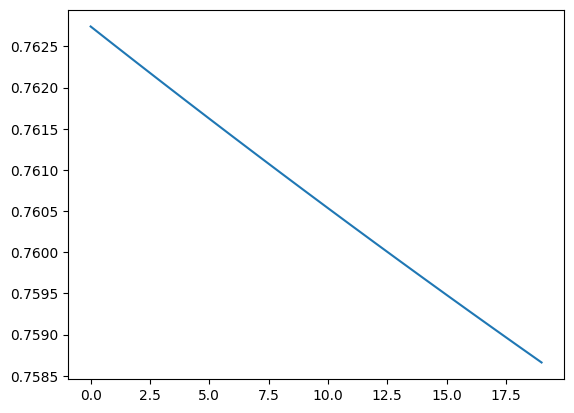

In [ ]:
plt.plot(error_hist)
plt.savefig('error_hist.png')

In [ ]:
x_test_normalized = scaler.transform(x_test)

In [ ]:
y_hat = logistic_regression(x_test, w)

accuracy(y_test, y_hat.flatten())

40
(40,)
(40, 1)


0.575

In [ ]:
y_predl = np.zeros([len(y_hat),1])
for i in range(len(y_hat)):
  if y_hat[i]>= 0.5:
    y_predl[i] = 1
  else:
    y_predl[i] = 0
y_predl

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

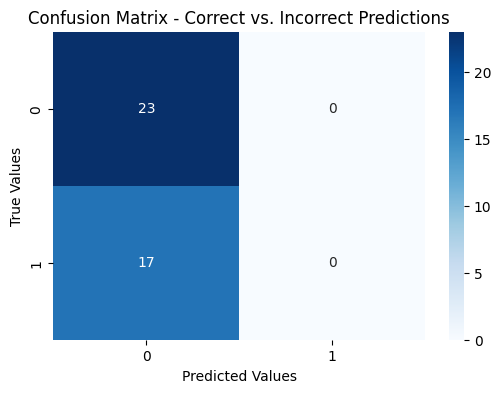

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_predl)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix - Correct vs. Incorrect Predictions')
plt.show()
plt.savefig('heatmap.png')

#Q2_4

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X,Y,test_size = 0.2)

In [ ]:
model_1 = LogisticRegression(max_iter= 20)
model_1.fit(x1_train,y1_train)
model_1.predict(x1_test), y1_test

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
        1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        1., 0., 0., 0., 1., 1.]))

(160,)
(160, 8)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

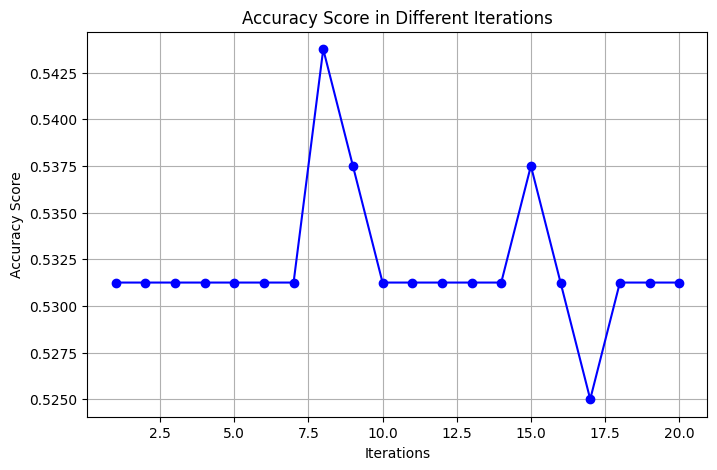

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


print(y1_train.shape)
print(x1_train.shape)

# Train the model and keep track of accuracy in each iteration
accuracy_scores = []
num_iterations = 20
for i in range(num_iterations):
    # Fit the model
    model_2 = LogisticRegression(max_iter = i)
    model_2.fit(x1_train,y1_train)

    # Calculate accuracy on the training set
    y_pred = model_2.predict(x1_train)
    accuracy = accuracy_score(y1_train, y_pred)
    accuracy_scores.append(accuracy)

# Create a plot of accuracy scores in different iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_iterations+1), accuracy_scores, marker='o', color='b', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score in Different Iterations')
plt.grid(True)
plt.savefig('accuracy_score')
plt.show()